# Ship Fuel Consumption & CO2 Emissions Analysis

### Import Necessary Packages & Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\HP\Downloads\archive (1)\ship_fuel_efficiency.csv")
print("Data Preview")

df.head()

Data Preview


,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


### Performaing Exploratory Data Analytics (EDA)

In [4]:
total_Count_Ship = df.ship_id.count()
print("Total Numbers of Trips".center(50))
print(total_Count_Ship)

print("-" * 70)
print("Basic Stats of Data".center(50))
df.describe()

              Total Numbers of Trips              
1440
----------------------------------------------------------------------
               Basic Stats of Data                


,distance,fuel_consumption,CO2_emissions,engine_efficiency
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,151.753354,4844.246535,13365.454882,82.582924
std,108.472230,4892.352813,13567.650118,7.158289
min,20.080000,237.880000,615.680000,70.010000
25%,79.002500,1837.962500,4991.485000,76.255000
50%,123.465000,3060.880000,8423.255000,82.775000
75%,180.780000,4870.675000,13447.120000,88.862500
max,498.550000,24648.520000,71871.210000,94.980000


In [152]:
total_UniqueCount_Ship = df.ship_id.nunique()
print("Numbers of Trips")
print(total_UniqueCount_Ship)
print('-' * 70)

rows_Columns = df.shape
print("Numbers of Rows and Columns")
print(rows_Columns)
print('-' * 70)

print("Sum of Consumed Fuel Liters")
total_fuel_consumption = df.fuel_consumption.sum()
print(F"{total_fuel_consumption} Ltr")

print('-' * 70)

print("Sum of CO2 Emission in KG")
total_fuel_consumption = df.CO2_emissions.sum()
print(f"{total_fuel_consumption} KG")

print('-' * 70)

print("Weather Condition wise # of Trips")
weather_Group = df.groupby('weather_conditions')['ship_id'].count().reset_index()

print(weather_Group)


print('-' * 70)

print("Get the Unique Value in Ship Type Column")

a = df.ship_type.unique()
print(a)

Numbers of Trips
120
----------------------------------------------------------------------
Numbers of Rows and Columns
(1440, 10)
----------------------------------------------------------------------
Sum of Consumed Fuel Liters
6975715.01 Ltr
----------------------------------------------------------------------
Sum of CO2 Emission in KG
19246255.03 KG
----------------------------------------------------------------------
Weather Condition wise # of Trips
  weather_conditions  ship_id
0               Calm      516
1           Moderate      462
2             Stormy      462
----------------------------------------------------------------------
Get the Unique Value in Ship Type Column
['Oil Service Boat' 'Fishing Trawler' 'Surfer Boat' 'Tanker Ship']


In [98]:
print('-' * 70)

print("Monthly Trend by Fuel Consumption & CO2 Emission")

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

month_wise_consumption = df.groupby('month', observed=False)[['fuel_consumption','CO2_emissions']].sum().reset_index()
month_wise_consumption = month_wise_consumption.sort_values('month')
print(month_wise_consumption)


print('-' * 70)

print("Ship Type wise # of Trips")

ship_type_category = df.groupby('ship_type')['route_id'].count().reset_index()
ship_type_category.columns = ['ship_type', '#_of_Trips']
print(ship_type_category)

print('-' * 70)

print("Total CO2 Emission Route wise")


route_id_wise_CO2_emission = df.groupby('route_id')['CO2_emissions'].sum().reset_index()
print(route_id_wise_CO2_emission)
print('-' * 70)


print("Fuel Type wise Total Engine Efficiency")

Fuel_type_wise_Engine_Efficiency = df.groupby('fuel_type')['engine_efficiency'].sum().reset_index()
print(Fuel_type_wise_Engine_Efficiency)

----------------------------------------------------------------------
Monthly Trend by Fuel Consumption & CO2 Emission
        month  fuel_consumption  CO2_emissions
0     January         578786.52     1607268.63
1    February         618705.49     1708736.47
2       March         649478.80     1797694.74
3       April         645326.99     1782722.81
4         May         629665.63     1754620.50
5        June         551895.99     1512158.04
6        July         615212.15     1689203.11
7      August         477182.79     1316098.93
8   September         563410.46     1545951.81
9     October         543808.80     1483997.71
10   November         573262.12     1579784.07
11   December         528979.27     1468018.21
----------------------------------------------------------------------
Ship Type wise # of Trips
          ship_type  #_of_Trips
0   Fishing Trawler         300
1  Oil Service Boat         408
2       Surfer Boat         324
3       Tanker Ship         408
------------

In [10]:
print('-' * 70)
print(f'Filted out the which is above the Avergae of Engine Efficiency ')
Avg_of_engine_efficiency = df.engine_efficiency.mean()
print(f' Avg. Fuel Efficiency is : {Avg_of_engine_efficiency}')
filter_Engine_Efficiency = df[df['engine_efficiency'] > Avg_of_engine_efficiency]

print('-' * 70)

print("Fuel Type wise Total Engine Efficiency which is above the Average")

Fuel_type_wise_Engine_Efficiency = filter_Engine_Efficiency.groupby('fuel_type')['engine_efficiency'].sum().reset_index()
print(f'Average Fuel : {round(Avg_of_engine_efficiency)} ')

print(Fuel_type_wise_Engine_Efficiency)

print('-' * 70)

print("Filter out where Ship type have Oil Service Boat")

df[df['ship_type'] == 'Oil Service Boat']

print('-' * 70)

print("Filter out where Ditance is between 20 to 100 ")

df[(df['distance'] <= 100) & (df['distance'] >= 20)   ]

----------------------------------------------------------------------
Filted out the which is above the Avergae of Engine Efficiency 
 Avg. Fuel Efficiency is : 82.58292361111111
----------------------------------------------------------------------
Fuel Type wise Total Engine Efficiency which is above the Average
Average Fuel : 83 
  fuel_type  engine_efficiency
0    Diesel           38952.87
1       HFO           26029.44
----------------------------------------------------------------------
Filter out where Ship type have Oil Service Boat
----------------------------------------------------------------------
Filter out where Ditance is between 20 to 100 


,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
5,NG001,Oil Service Boat,Port Harcourt-Lagos,June,85.93,Diesel,2342.13,6753.42,Stormy,72.82
6,NG001,Oil Service Boat,Warri-Bonny,July,85.67,HFO,2974.79,8498.16,Moderate,93.93
7,NG001,Oil Service Boat,Warri-Bonny,August,44.81,Diesel,1376.38,3509.56,Moderate,91.10
...,...,...,...,...,...,...,...,...,...,...
1411,NG118,Tanker Ship,Lagos-Apapa,August,81.84,HFO,3055.60,8005.10,Moderate,93.35
1425,NG119,Tanker Ship,Escravos-Lagos,October,88.25,HFO,4214.07,11879.74,Moderate,79.03
1432,NG120,Fishing Trawler,Port Harcourt-Lagos,May,57.37,HFO,1419.70,3712.48,Calm,92.86
1435,NG120,Fishing Trawler,Port Harcourt-Lagos,August,63.84,Diesel,1633.85,4852.28,Stormy,75.88


In [88]:
#Identify all Unique values in Columns
print("Display all unique records")

Unique_Route = df.route_id.unique()
Unique_FuelType = df.fuel_type.unique()
Unique_Weather = df['weather_conditions'].unique()
Unique_Weather_Count = df['weather_conditions'].nunique()
Unique_FuelType_Count = df.fuel_type.nunique()

print(Unique_Route)
print(Unique_FuelType)
print(Unique_Weather)
print(Unique_Weather_Count)
print(Unique_FuelType_Count)


print('-' * 70)
print("Total Distance by Route Name")

route_Distance = df.groupby('route_id')['distance'].mean().reset_index()
print(route_Distance)

print('-' * 70)
print("Min and Max of Ship wise Distance")


ShipType_by_Min_Distance = df.groupby('ship_type')['distance'].min().reset_index()
ShipType_by_Max_Distance = df.groupby('ship_type')['distance'].max().reset_index()
print(ShipType_by_Min_Distance)
print('-' * 70)
print(ShipType_by_Max_Distance)

print('-' * 70)
print("Ship Type wise CO2 Emission")


Ship_Type_By_CO2_Emission = df.groupby('ship_type')['CO2_emissions'].sum().reset_index()

max_value = Ship_Type_By_CO2_Emission['CO2_emissions'].max()

def highlight_max(s):
    return ['background-color: yellow' if v == max_value else '' for v in s]

Ship_Type_By_CO2_Emission_styled = Ship_Type_By_CO2_Emission.style.apply(highlight_max, subset=['CO2_emissions'])
Ship_Type_By_CO2_Emission_styled


Display all unique records
['Warri-Bonny' 'Port Harcourt-Lagos' 'Lagos-Apapa' 'Escravos-Lagos']
['HFO' 'Diesel']
['Stormy' 'Moderate' 'Calm']
3
2
----------------------------------------------------------------------
Total Distance by Route Name
              route_id    distance
0       Escravos-Lagos  153.232412
1          Lagos-Apapa  158.860644
2  Port Harcourt-Lagos  150.819923
3          Warri-Bonny  141.752347
----------------------------------------------------------------------
Min and Max of Ship wise Distance
          ship_type  distance
0   Fishing Trawler     50.74
1  Oil Service Boat     20.08
2       Surfer Boat     20.17
3       Tanker Ship     52.64
----------------------------------------------------------------------
          ship_type  distance
0   Fishing Trawler    199.96
1  Oil Service Boat    149.95
2       Surfer Boat    199.91
3       Tanker Ship    498.55
----------------------------------------------------------------------
Ship Type wise CO2 Emission


,ship_type,CO2_emissions
0,Fishing Trawler,2673927.180000
1,Oil Service Boat,2932635.150000
2,Surfer Boat,1483154.250000
3,Tanker Ship,12156538.450000


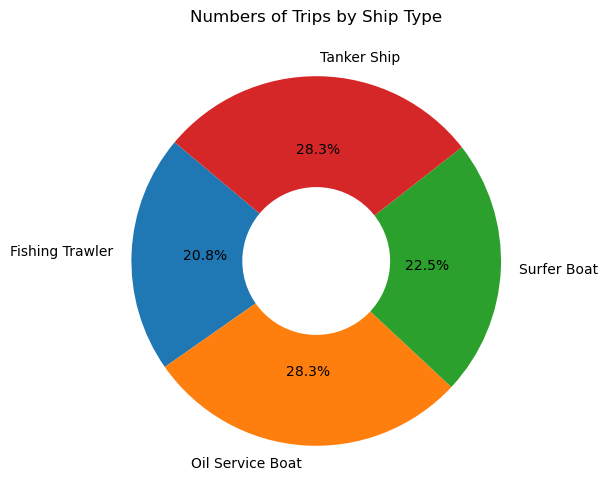

In [142]:
plt.figure(figsize = (8,6))
plt.pie(ship_type_category['#_of_Trips'], labels = ship_type_category['ship_type'],autopct='%1.1f%%', startangle = 140)
center_circle = plt.Circle((0,0),0.40, fc = 'white')
plt.gca().add_artist(center_circle)
plt.title('Numbers of Trips by Ship Type')
plt.show()


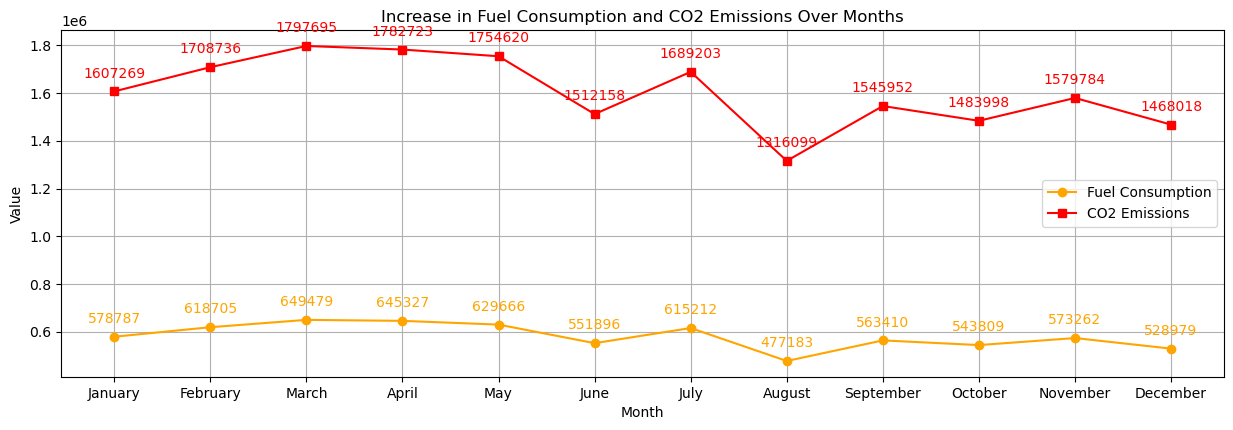

In [140]:


plt.figure(figsize=(15, 4.5))

# Plot fuel consumption
plt.plot(month_wise_consumption['month'], month_wise_consumption['fuel_consumption'], 
         marker='o', label='Fuel Consumption', color='orange')
# Plot CO2 emissions
plt.plot(month_wise_consumption['month'], month_wise_consumption['CO2_emissions'], 
         marker='s', label='CO2 Emissions', color='red')

# Adding Data Labels
for i, txt in enumerate(month_wise_consumption['fuel_consumption']):
    plt.annotate(f'{txt:.0f}', 
                 (month_wise_consumption['month'][i], month_wise_consumption['fuel_consumption'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='orange')

for i, txt in enumerate(month_wise_consumption['CO2_emissions']):
    plt.annotate(f'{txt:.0f}', 
                 (month_wise_consumption['month'][i], month_wise_consumption['CO2_emissions'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')

# Labels and Title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Increase in Fuel Consumption and CO2 Emissions Over Months')
plt.legend()
plt.grid(True)

plt.show()

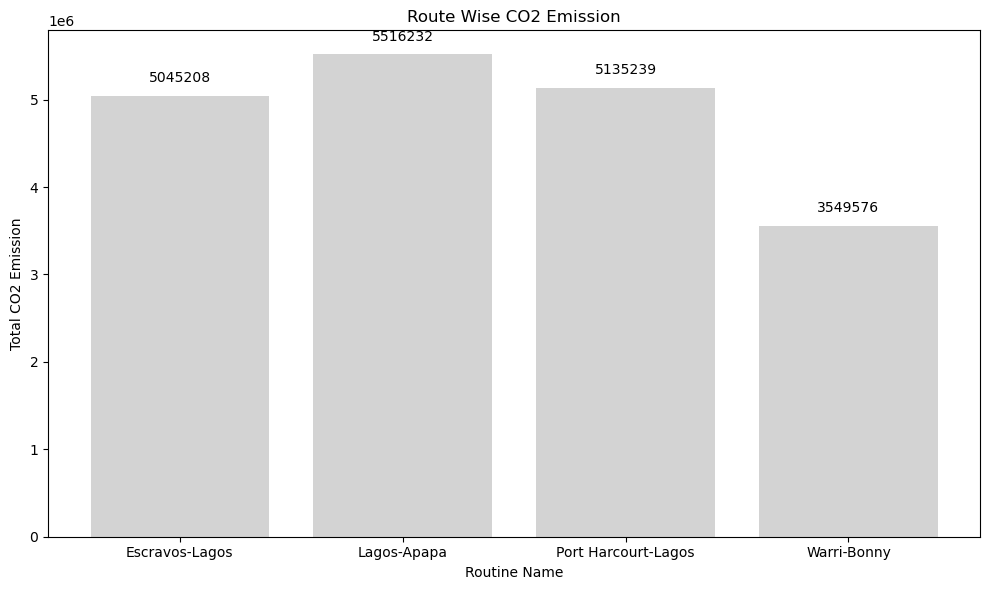

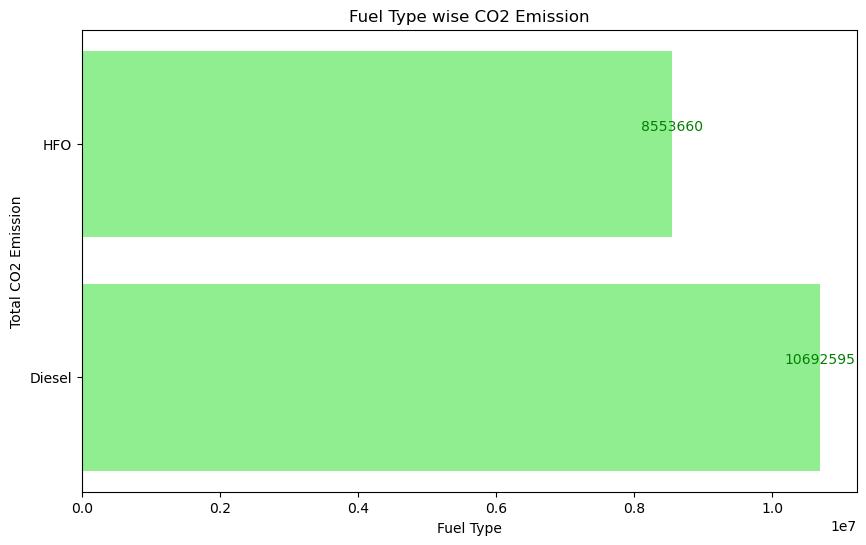

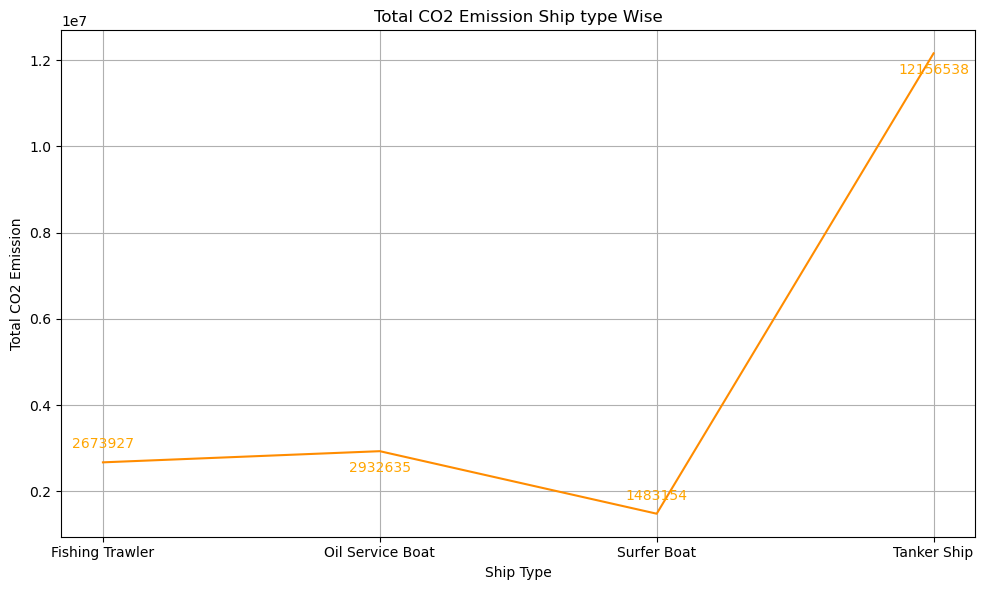

Weather Condition wise Sum of CO2 Emission
  weather_conditions  CO2_emissions
0               Calm     7189515.13
1           Moderate     6090819.68
2             Stormy     5965920.22


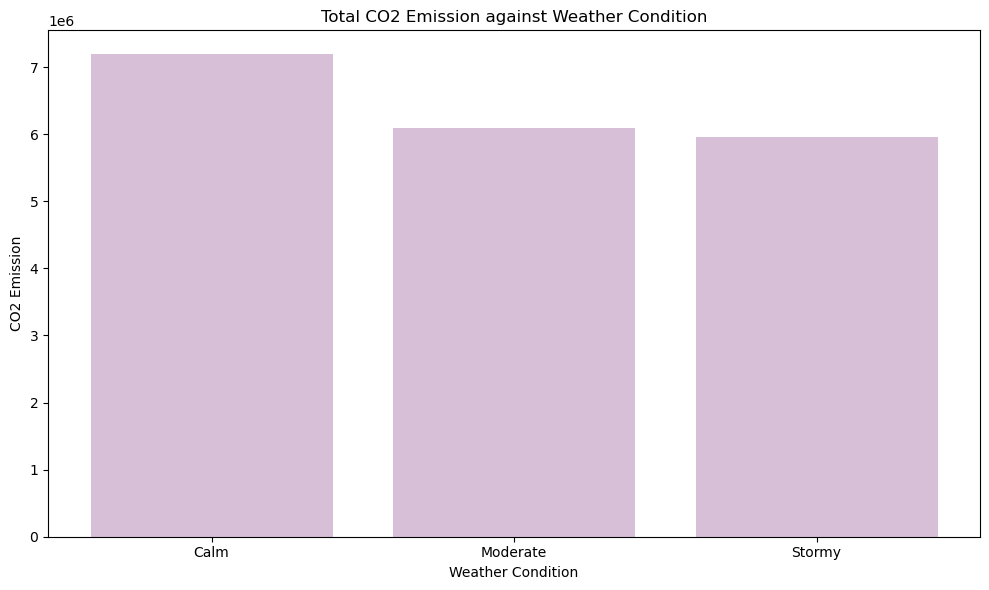

In [144]:
plt.figure(figsize = (10,6))
plt.bar(route_id_wise_CO2_emission['route_id'],route_id_wise_CO2_emission['CO2_emissions'],color='lightgrey')



# Adding Data Labels
for i, txt in enumerate(route_id_wise_CO2_emission['CO2_emissions']):
    plt.annotate(f'{txt:.0f}', 
                 (route_id_wise_CO2_emission['route_id'][i], route_id_wise_CO2_emission['CO2_emissions'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black')

plt.xlabel('Routine Name')
plt.ylabel('Total CO2 Emission')
plt.title('Route Wise CO2 Emission')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()









fuel_type_wise_CO2 = df.groupby('fuel_type')['CO2_emissions'].sum().reset_index()

plt.figure(figsize = (10,6))
plt.barh(fuel_type_wise_CO2['fuel_type'],fuel_type_wise_CO2['CO2_emissions'],color = 'lightgreen')
  
for i, txt in enumerate(fuel_type_wise_CO2['CO2_emissions']):
    plt.annotate(f'{txt:.0f}', 
                 (fuel_type_wise_CO2['CO2_emissions'][i], fuel_type_wise_CO2['fuel_type'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='green')
    
plt.xlabel('Fuel Type')
plt.ylabel('Total CO2 Emission')
plt.title('Fuel Type wise CO2 Emission')
plt.grid(False)
plt.show()


plt.figure(figsize = (10,6))
plt.plot(Ship_Type_By_CO2_Emission['ship_type'],Ship_Type_By_CO2_Emission['CO2_emissions'],color = 'darkorange')

# Adding Data Labels with adjusted positions
for i, txt in enumerate(Ship_Type_By_CO2_Emission['CO2_emissions']):
    offset = 10 if i % 2 == 0 else -15 
    plt.annotate(f'{txt:.0f}', 
                 (Ship_Type_By_CO2_Emission['ship_type'][i], Ship_Type_By_CO2_Emission['CO2_emissions'][i]),
                 textcoords="offset points", xytext=(0, offset), ha='center', fontsize=10, color='orange')

plt.xlabel('Ship Type')
plt.ylabel('Total CO2 Emission')
plt.title('Total CO2 Emission Ship type Wise')
plt.tight_layout()
plt.grid(True)

plt.show()





print("Weather Condition wise Sum of CO2 Emission")
weather_Group_CO2_Emission = df.groupby('weather_conditions')['CO2_emissions'].sum().reset_index()

print(weather_Group_CO2_Emission)



plt.figure(figsize = (10,6))
plt.bar(weather_Group_CO2_Emission['weather_conditions'],weather_Group_CO2_Emission['CO2_emissions'], color = 'thistle')
plt.xlabel('Weather Condition')
plt.ylabel('CO2 Emission')
plt.title('Total CO2 Emission against Weather Condition')
plt.tight_layout()
#plt.xticks(rotation = 45)
plt.show()

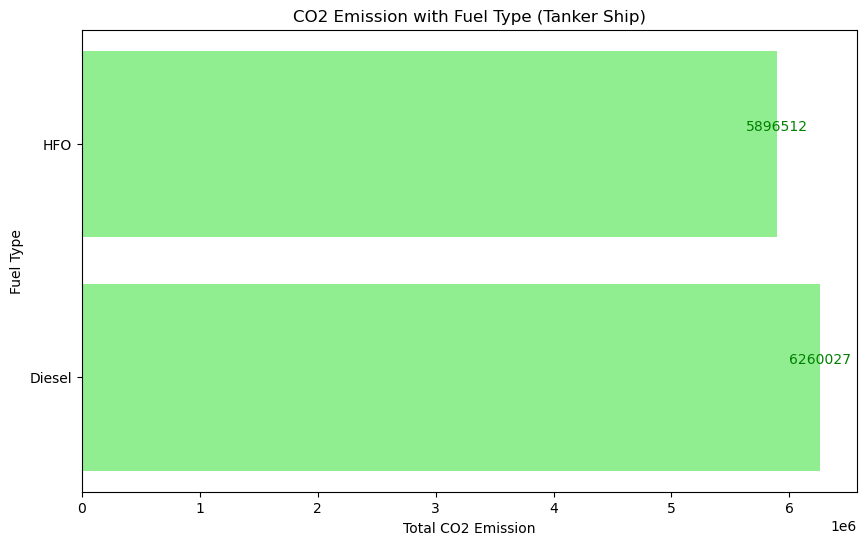

In [94]:
Tanker_Ship_Data = df[df['ship_type'] == 'Tanker Ship']
Tanker_Ship_Data_with_Group = Tanker_Ship_Data.groupby(Tanker_Ship_Data['fuel_type'])['CO2_emissions'].sum().reset_index()

plt.figure(figsize = (10,6))
plt.barh(Tanker_Ship_Data_with_Group['fuel_type'],Tanker_Ship_Data_with_Group['CO2_emissions'], color = 'lightgreen')


for i, txt in enumerate(Tanker_Ship_Data_with_Group['CO2_emissions']):
    plt.annotate(f'{txt:.0f}', 
                 (Tanker_Ship_Data_with_Group['CO2_emissions'][i], Tanker_Ship_Data_with_Group['fuel_type'][i]),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='green')
plt.xlabel('Total CO2 Emission')
plt.ylabel('Fuel Type')
plt.title('CO2 Emission with Fuel Type (Tanker Ship)')

plt.show()